In [2]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para métricas
import scipy 
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [3]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Variable Target: SalePrice
La variable objetivo es de tipo **numérica**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Regresión**. 
<br> <br/>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable. 

In [4]:
# Algunas estadísticas
variable_target = df['SalePrice']
variable_target.describe().round(0)

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Distribución de SalePrice')

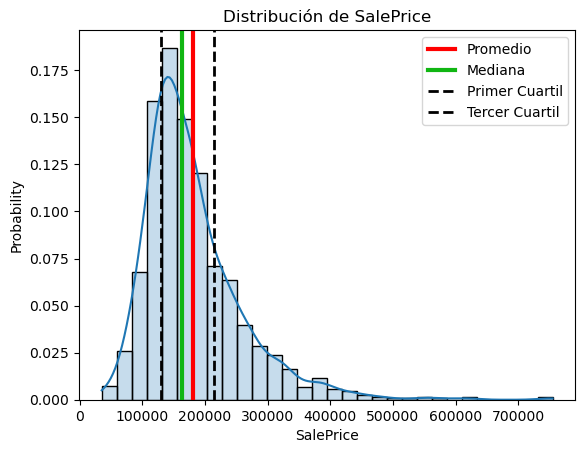

In [5]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SalePrice',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de SalePrice')

## Análisis Variable Target: SalePrice
Se puede observar que la variable tiene una distribución asimétrica positiva (la mediana es menor que el promedio), concentrando gran porción de los registros en valores bajos, y observando muy pocos registros en valores altos.  
<br> <br/>
Esto indicaría que hay muy pocas casas con precios extremadamente altos. 
<br> <br/>
Al tratar con una variable target de este tipo de distribución, una buena prácica suele ser intentar predecir el logaritmo de la variable, para suavizar un poco la curva de valores posibles. 
<br> <br/>
A continuación se presentará el histograma del logaritmo de la variable target. 

Text(0.5, 1.0, 'Distribución de SalePrice transformado a Logaritmo')

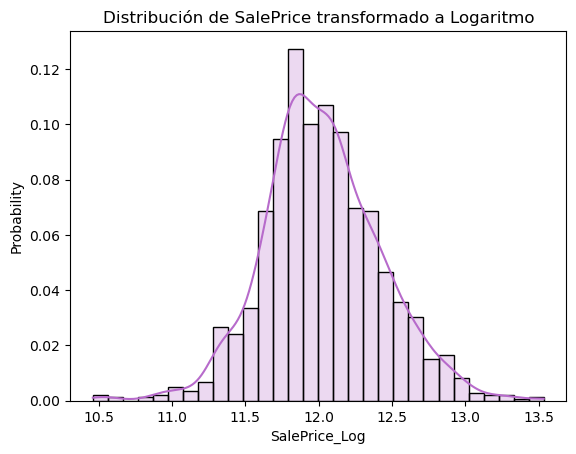

In [6]:
# Primero genero la variable logaritmica 
df['SalePrice_Log'] = np.log(df['SalePrice'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SalePrice_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de SalePrice transformado a Logaritmo')

## Conclusión: 
De esta manera, se puede apreciar una distribución más similar a una distribución "Normal", obteniendo una forma más simétrica de la variable. 

# Correlación 
Lo próximo que analizaremos es la matriz correlación entre todas las variables numéricas. 


C:\Users\usernosis\AppData\Local\Temp\ipykernel_32844\2142690351.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df[variables].corr(),dtype = bool))
C:\Users\usernosis\AppData\Local\Temp\ipykernel_32844\2142690351.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[variables].corr(),


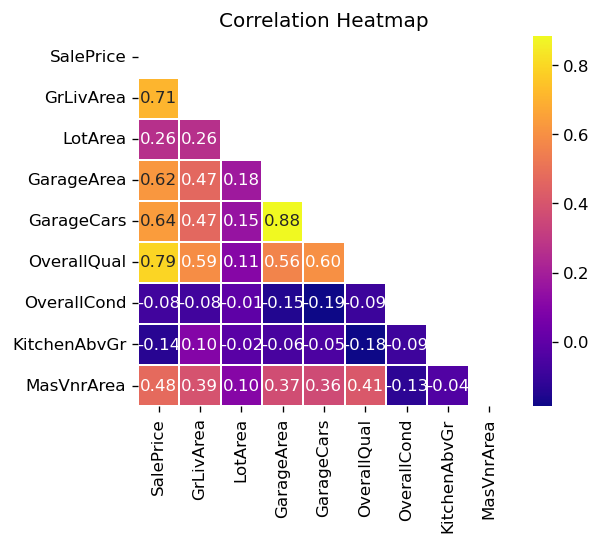

In [7]:
# Correlaciones
# Seleccionamos un set de variables para que el gráfico sea más amigable 
variables = ['SalePrice','GrLivArea','LotArea','GarageArea','GarageCars','OverallQual','OverallCond',
            'KitchenAbvGr','KitchenQual','MasVnrArea']

# Armo el gráfico
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df[variables].corr(),dtype = bool))
sns.heatmap(df[variables].corr(),
            mask = mask, 
            fmt = ".2f",
            annot = True,
            lw = 1,
            cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

# OverallQual
Esta variable toma valores del 1 al 10, puntuando el estado de material y finalización de la casa. 10 es excelente, 1 es muy malo. 
 <br> <br/>
 Es una variable más bien categórica, y ordinal. 


## OverallQual: Análisis Univariado 
Lo que observamos en este caso es que la mayor parte de las casas fueron calificadas entre 4 y 8 puntos (94% de las observaciones). 

Text(0, 0.5, 'Cantidad de Viviendas')

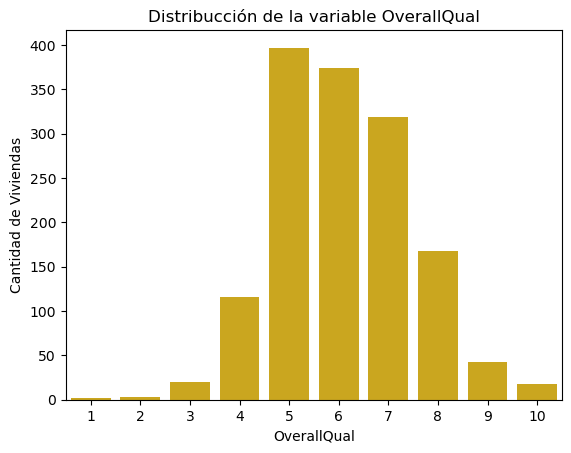

In [8]:
# Cantidad de casos por categoría 
plt.figure()
sns.countplot(data = df,
              x = 'OverallQual',
             color = '#E7B602')
plt.title('Distribucción de la variable OverallQual')
plt.ylabel('Cantidad de Viviendas')

In [9]:
# Creo OverallQual reducida 
df['Calificacion'] = np.where(df['OverallQual'] <= 5, 'Baja',
                                np.where(df['OverallQual'] >= 8, 'Alta',
                                        'Media'))
orden_etiquetas = ['Baja', 'Media', 'Alta']  
df['Calificacion'] = df['Calificacion'].astype('category')
df['Calificacion'] = df['Calificacion'].cat.reorder_categories(orden_etiquetas, ordered=True)
df['Calificacion'].value_counts()

Media    693
Baja     538
Alta     229
Name: Calificacion, dtype: int64

Text(0.5, 1.0, 'Distribución de SalePrice transformado a Logaritmo')

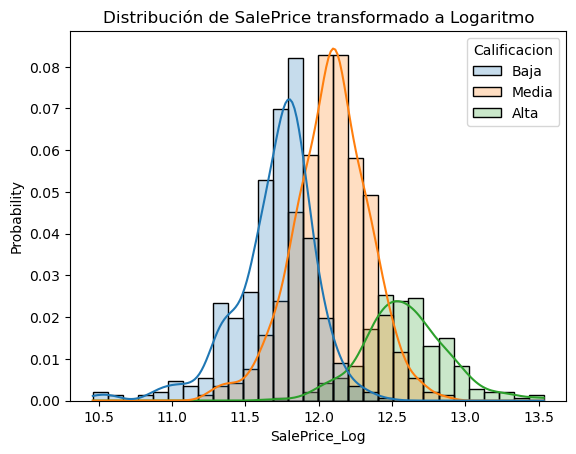

In [10]:
# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SalePrice_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            hue = 'Calificacion')
plt.title('Distribución de SalePrice transformado a Logaritmo')

<Figure size 768x576 with 0 Axes>

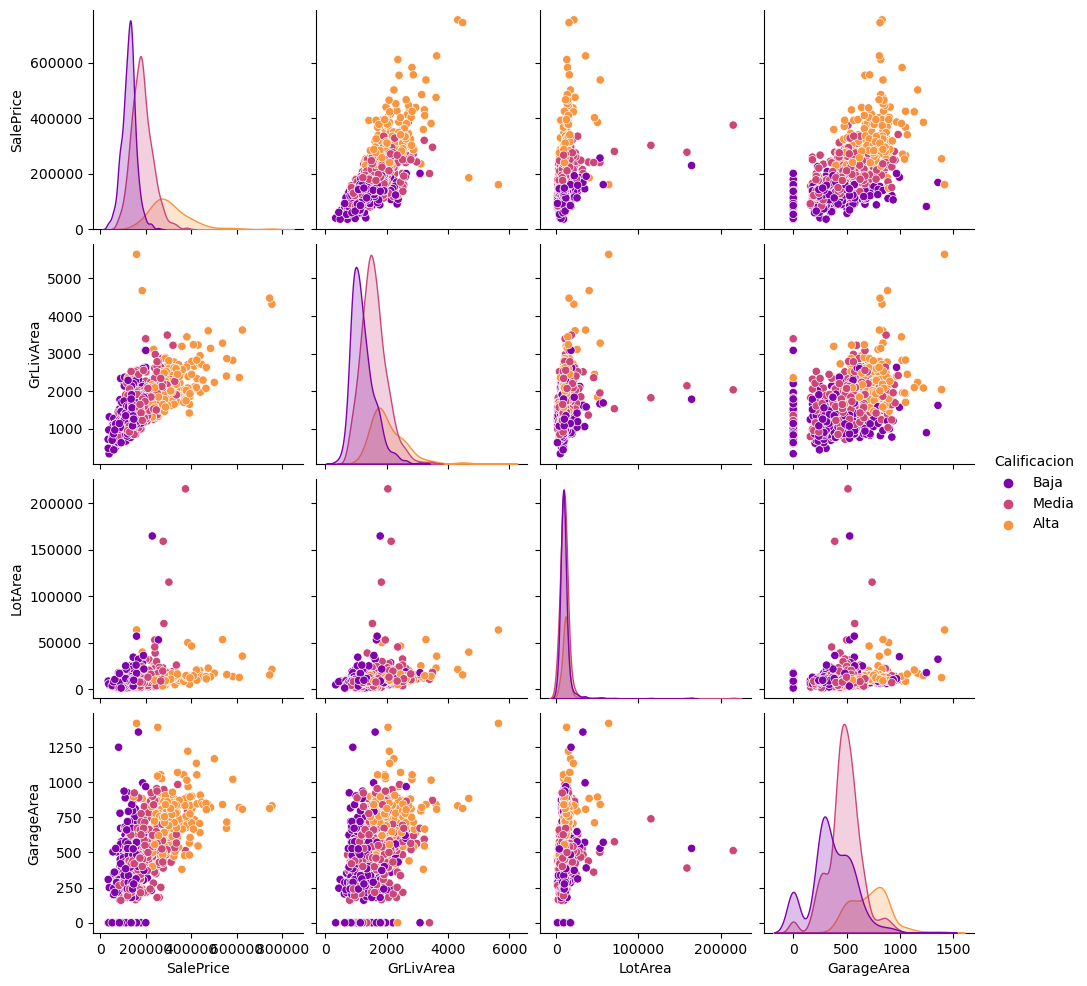

In [11]:
# Crear el Pairplot 
variables = ['SalePrice','GrLivArea','LotArea','GarageArea','Calificacion']
plt.figure(dpi = 120)
sns.pairplot(df[variables],
             hue = 'Calificacion',
             palette = 'plasma')
plt.show()

Text(0.5, 1.0, 'Relación entre GrLivArea, SalePrice y Calificación')

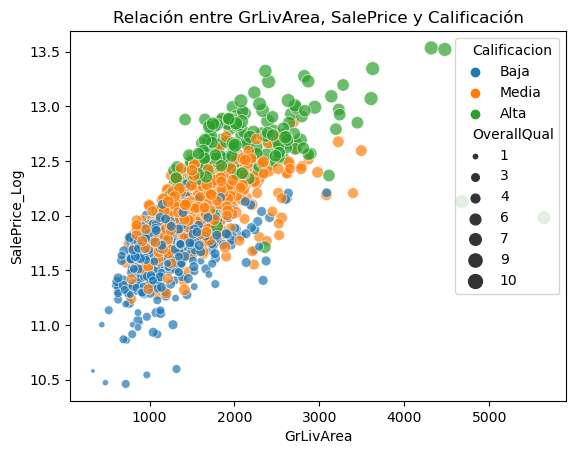

In [12]:
# 'SalePrice','GrLivArea' y 'Calificacion'
sns.scatterplot(data = df,
                x = 'GrLivArea',
                y = 'SalePrice_Log',
                hue = 'Calificacion',
                size = 'OverallQual',
                sizes = (10,100),
                alpha = 0.7)
plt.title('Relación entre GrLivArea, SalePrice y Calificación')

# Análisis PCA 
La variable más predictiva sobre el precio de venta es OverallQual. Buscaremos las variables con mayor correlación con ella para extraer sus componentes principales y usarlas luego como features. 


In [13]:
# Primero calculo variables de antiguedad
df['Antig_Viv'] = df['YrSold'] - df['YearBuilt']
df['Antig_Rem'] = np.where( df['YearRemodAdd'] > df['YrSold'],
                            df['YrSold'] - df['YearBuilt'],
                            df['YrSold'] - df['YearRemodAdd'])

C:\Users\usernosis\AppData\Local\Temp\ipykernel_32844\2815776234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr(method='pearson')


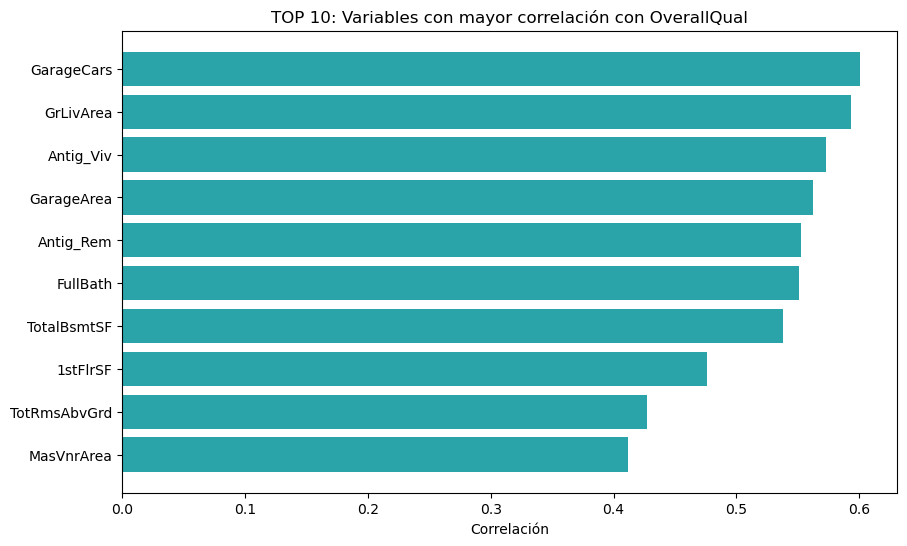

In [14]:
# Calculo matriz de correlación 
matriz_correlacion = df.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['OverallQual']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['SalePrice', 'SalePrice_Log','OverallQual','YearBuilt','YearRemodAdd','YrSold',
                     'GarageYrBlt']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:10]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#2AA3A9')
plt.xlabel('Correlación')
plt.title('TOP 10: Variables con mayor correlación con OverallQual')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [15]:
# Renombro columna que empieza con numero porque trae problemas 
df = df.rename(columns={'1stFlrSF': 'Var_1stFlrSF'})

In [16]:
# Las menciono en un vector
variables_relacionadas = ['GarageCars','GrLivArea','Antig_Viv','GarageArea',
                         'Antig_Rem','FullBath','TotalBsmtSF','Var_1stFlrSF','TotRmsAbvGrd',
                          'MasVnrArea']

# Las selecciono 
# Selecciono variables que voy a unificar
df_PCA = df[variables_relacionadas]
df_PCA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageCars    1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   Antig_Viv     1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   Antig_Rem     1460 non-null   int64  
 5   FullBath      1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   Var_1stFlrSF  1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   MasVnrArea    1452 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [17]:
# MasVnrArea tiene vacíos, la completo con la mediana 
df_PCA['MasVnrArea'] = df_PCA['MasVnrArea'].fillna(df_PCA['MasVnrArea'].median())
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageCars    1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   Antig_Viv     1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   Antig_Rem     1460 non-null   int64  
 5   FullBath      1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   Var_1stFlrSF  1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   MasVnrArea    1460 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


C:\Users\usernosis\AppData\Local\Temp\ipykernel_32844\3037755373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PCA['MasVnrArea'] = df_PCA['MasVnrArea'].fillna(df_PCA['MasVnrArea'].median())


# 8 Componentes

In [18]:
# Importo librerias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)
# Extraer la matriz de características
X = df_PCA.values
# Crear un objeto PCA
pca = PCA(n_components = 8)
# Ajustar el modelo PCA a los datos
pca.fit(X)
# Obtener las componentes principales
componentes_principales = pca.transform(X)
# Crear un nuevo DataFrame con las componentes principales
df_PCA_final = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final = df_PCA_final.add_prefix(prefijo)
df_PCA_final.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-106.305743,364.750522,189.746735,-82.212937,-5.042191,-29.664275,-0.519028,-0.971071
1,-21.519742,-342.083143,-56.186401,-15.292762,-76.919211,0.261846,-8.592425,-0.282837
2,15.856460,360.250569,189.611993,-58.719390,-61.604390,-23.931861,-0.976192,1.221836
3,-111.017123,389.176318,94.552446,96.563328,-170.111580,57.620813,12.702478,0.250002
4,580.209995,457.185026,348.679952,-5.671930,-18.281755,-2.765224,-1.381821,-0.761110


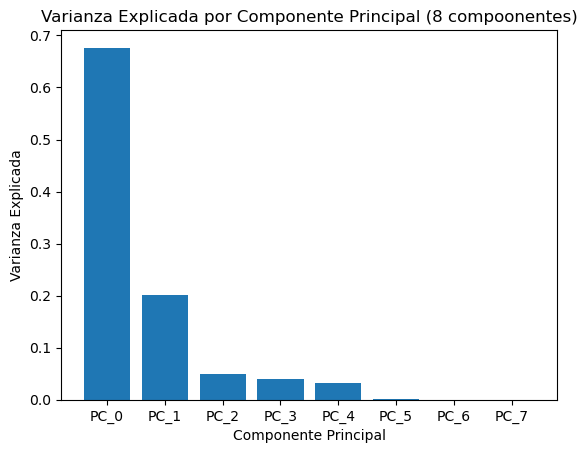

In [19]:
# Visualizar la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = df_PCA_final.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal (8 compoonentes)')
plt.show()

In [20]:
# Normalizando manualmente 
variables_relacionadas = ['GarageCars','GrLivArea','Antig_Viv','GarageArea',
                         'Antig_Rem','FullBath','TotalBsmtSF','Var_1stFlrSF','TotRmsAbvGrd',
                          'MasVnrArea']

medias = df[variables_relacionadas].mean()
desvios =  np.std(df[variables_relacionadas], ddof = 0)

df_normalizada = (df[variables_relacionadas] - medias) / desvios
df_normalizada.head()

,GarageCars,GrLivArea,Antig_Viv,GarageArea,Antig_Rem,FullBath,TotalBsmtSF,Var_1stFlrSF,TotRmsAbvGrd,MasVnrArea
0,0.311725,0.370333,-1.043259,0.351000,-0.870007,0.789741,-0.459303,-0.793434,0.912210,0.510015
1,0.311725,-0.482512,-0.183465,-0.060731,0.390122,0.789741,0.466465,0.257140,-0.318683,-0.572835
2,0.311725,0.515013,-0.977121,0.631726,-0.821541,0.789741,-0.313369,-0.627826,-0.318683,0.322174
3,1.650307,0.383659,1.800676,0.790804,0.632455,-1.026041,-0.687324,-0.521734,0.296763,-0.572835
4,1.650307,1.299326,-0.944052,1.698485,-0.724607,0.789741,0.199680,-0.045611,1.527656,1.360826


In [21]:
scaler = StandardScaler()
df_normalizada_2 = scaler.fit_transform(df[variables_relacionadas])
df_normalizada_2 = pd.DataFrame(data = df_normalizada_2)
df_normalizada_2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.311725,0.370333,-1.043259,0.351000,-0.870007,0.789741,-0.459303,-0.793434,0.912210,0.510015
1,0.311725,-0.482512,-0.183465,-0.060731,0.390122,0.789741,0.466465,0.257140,-0.318683,-0.572835
2,0.311725,0.515013,-0.977121,0.631726,-0.821541,0.789741,-0.313369,-0.627826,-0.318683,0.322174
3,1.650307,0.383659,1.800676,0.790804,0.632455,-1.026041,-0.687324,-0.521734,0.296763,-0.572835
4,1.650307,1.299326,-0.944052,1.698485,-0.724607,0.789741,0.199680,-0.045611,1.527656,1.360826


<Axes: xlabel='GrLivArea', ylabel='Probability'>

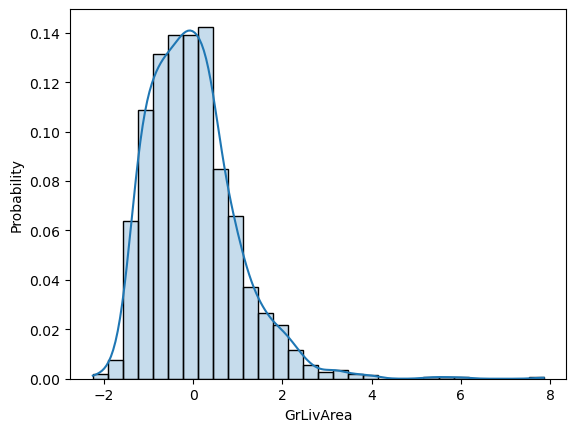

In [22]:
sns.histplot(data = df_normalizada,
             x = 'GrLivArea',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')

In [23]:
round(df_normalizada['GrLivArea'].mean(),6)

-0.0

In [24]:
round(df_normalizada['GrLivArea'].std(),6)

1.000343

# 4 Componentes

In [25]:
# Extraer la matriz de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)
# Crear un objeto PCA
pca = PCA(n_components = 4)
# Ajustar el modelo PCA a los datos
pca.fit(X)
# Obtener las componentes principales
componentes_principales = pca.transform(X)
# Crear un nuevo DataFrame con las componentes principales
df_PCA_final = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final = df_PCA_final.add_prefix(prefijo)
df_PCA_final.head()

,PC_0,PC_1,PC_2,PC_3
0,1.123946,-0.473160,-1.589125,-0.311245
1,0.134372,-0.266701,0.202931,0.413045
2,0.943805,-1.013948,-1.052819,-0.227752
3,-0.439564,0.742186,0.069643,-1.982555
4,3.208300,-0.052782,-0.875560,-1.459426


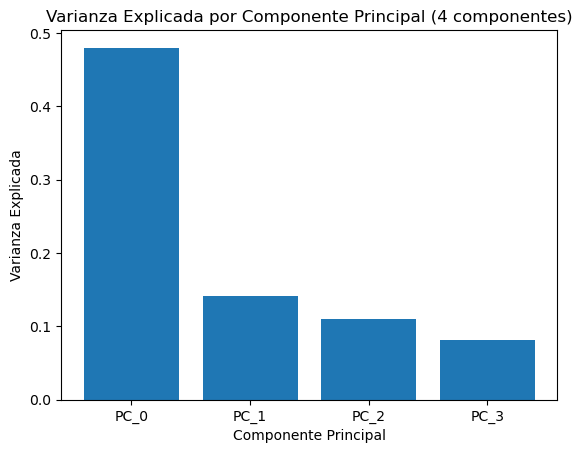

In [26]:
# Visualizar la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = df_PCA_final.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal (4 componentes)')
plt.show()

# Comparemos modelos 

In [27]:
df = pd.concat([df, df_PCA_final], axis=1) 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,SalePrice_Log,Calificacion,Antig_Viv,Antig_Rem,PC_0,PC_1,PC_2,PC_3
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Normal,208500,12.247694,Media,5,5,1.123946,-0.473160,-1.589125,-0.311245
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Normal,181500,12.109011,Media,31,31,0.134372,-0.266701,0.202931,0.413045
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Normal,223500,12.317167,Media,7,6,0.943805,-1.013948,-1.052819,-0.227752
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Abnorml,140000,11.849398,Media,91,36,-0.439564,0.742186,0.069643,-1.982555
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Normal,250000,12.429216,Alta,8,8,3.208300,-0.052782,-0.875560,-1.459426


In [28]:
# MasVnrArea tiene vacíos, la completo con la mediana 
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [29]:
# Separo usando el paquete sklearn
df_train,df_test = train_test_split(df,
                                    test_size = 0.25, #Porcentaje de muestra test 
                                    random_state = 42) #Semilla

# Modelo 1: Con 11 Features

In [30]:
features_base = ['OverallQual','GarageCars','GrLivArea','Antig_Viv','GarageArea',
                 'Antig_Rem','FullBath','TotalBsmtSF','Var_1stFlrSF','TotRmsAbvGrd','MasVnrArea']
model_formula = 'SalePrice_Log ~ ' + ' + '.join(df_train[features_base].columns)
lm1 = sm.ols(formula = model_formula, data = df_train).fit()

coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))
print('')
print('-----------------------')
pvalores_1 = lm1.pvalues
print('P-Valores:')
print(pvalores_1.head(21).round(6).sort_values(ascending=False))

Coeficientes:
Intercept       10.924235
OverallQual      0.096310
GarageCars       0.087618
GrLivArea        0.000209
Antig_Viv       -0.001962
GarageArea       0.000044
Antig_Rem       -0.002169
FullBath        -0.026336
TotalBsmtSF      0.000063
Var_1stFlrSF     0.000060
TotRmsAbvGrd     0.007425
MasVnrArea      -0.000020
dtype: float64

-----------------------
P-Valores:
MasVnrArea      0.565000
GarageArea      0.419600
TotRmsAbvGrd    0.205586
FullBath        0.064886
Var_1stFlrSF    0.021819
TotalBsmtSF     0.005753
Intercept       0.000000
OverallQual     0.000000
GarageCars      0.000000
GrLivArea       0.000000
Antig_Viv       0.000000
Antig_Rem       0.000000
dtype: float64


# Modelo 2: con 1 componente y OverallQual

In [31]:
# Ajusto el modelo
features_base = ['PC_0','OverallQual']
model_formula = 'SalePrice_Log ~ ' + ' + '.join(df_train[features_base].columns)
lm2 = sm.ols(formula = model_formula, data = df_train).fit()

coeficientes = lm2.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))
print('')
print('-----------------------')
pvalores_1 = lm2.pvalues
print('P-Valores:')
print(pvalores_1.head(21).round(6).sort_values(ascending=False))

Coeficientes:
Intercept      11.350423
PC_0            0.102537
OverallQual     0.110188
dtype: float64

-----------------------
P-Valores:
Intercept      0.0
PC_0           0.0
OverallQual    0.0
dtype: float64


In [32]:
# Genero columna de predicciones
df_train['Pred_1'] = lm1.predict(df_train)
df_test['Pred_1'] = lm1.predict(df_test)
df_train['Pred_2'] = lm2.predict(df_train)
df_test['Pred_2'] = lm2.predict(df_test)

# Modelo 1 vs Modelo 2

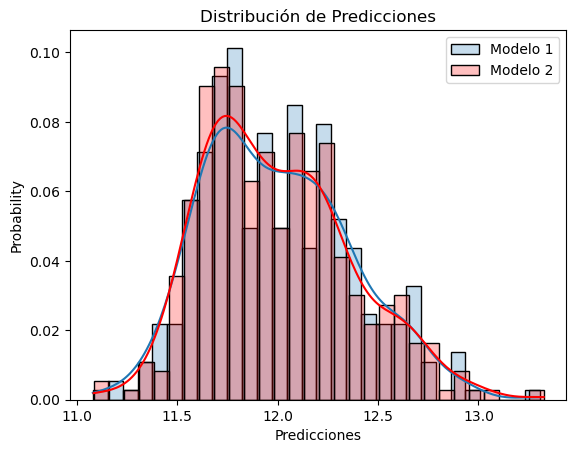

In [33]:
plt.figure()
# Histograma
sns.histplot(data = df_test,
             x = 'Pred_1',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            label = 'Modelo 1')
sns.histplot(data  = df_test, 
             x = 'Pred_2', 
             bins = 30, 
             alpha = 0.25, 
             kde = True, 
             stat='probability', 
             color='red', 
             label='Modelo 2')
plt.title('Distribución de Predicciones')
plt.xlabel('Predicciones')
plt.legend()
plt.show()

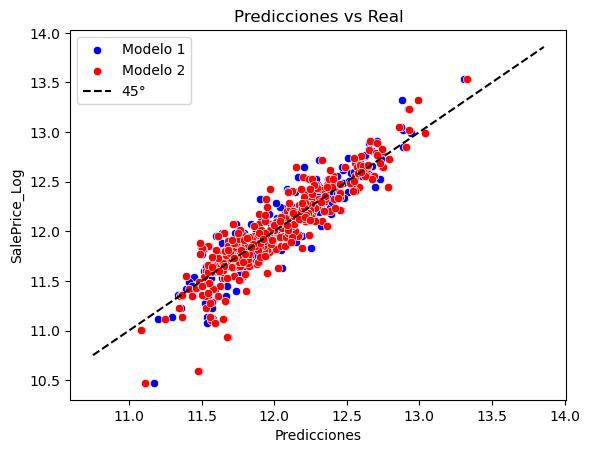

In [34]:
plt.figure()
sns.scatterplot(data = df_test,
                x = 'Pred_1',
                y = 'SalePrice_Log',
                color = 'blue',
               label = 'Modelo 1')
sns.scatterplot(data = df_test,
                x = 'Pred_2',
                y = 'SalePrice_Log',
                color = 'red',
               label = 'Modelo 2')
minimo = df_test['Pred_2'].min()
maximo = df_test['Pred_2'].max()
linea_45_grados = np.linspace(minimo*0.97, maximo*1.04, 100)  
plt.plot(linea_45_grados, linea_45_grados, 
         color='black', linestyle='--', label='45°')  # Trazar la línea
plt.title('Predicciones vs Real')
plt.xlabel('Predicciones')
plt.legend()
plt.show()

In [35]:
# Metricas
rmse_1_test= mean_squared_error(df_test['SalePrice_Log'], df_test['Pred_1'], squared=False)
r_squared_1_test = r2_score(df_test['SalePrice_Log'], df_test['Pred_1'])
rmse_1_train = mean_squared_error(df_train['SalePrice_Log'], df_train['Pred_1'], squared=False)
r_squared_1_train = r2_score(df_train['SalePrice_Log'], df_train['Pred_1'])

rmse_2_test = mean_squared_error(df_test['SalePrice_Log'], df_test['Pred_2'], squared=False)
r_squared_2_test = r2_score(df_test['SalePrice_Log'], df_test['Pred_2'])
rmse_2_train = mean_squared_error(df_train['SalePrice_Log'], df_train['Pred_2'], squared=False)
r_squared_2_train = r2_score(df_train['SalePrice_Log'], df_train['Pred_2'])

print('RMSE')
print('MODELO 1')
print('TEST: ' + str(rmse_1_test.round(4)))
print('TRAIN: ' + str(rmse_1_train.round(4)))
print('----------------')
print('MODELO 2')
print('TEST: ' + str(rmse_2_test.round(4)))
print('TRAIN: ' + str(rmse_2_train.round(4)))

RMSE
MODELO 1
TEST: 0.1646
TRAIN: 0.1713
----------------
MODELO 2
TEST: 0.1669
TRAIN: 0.1786


In [36]:
print('r - 2')
print('MODELO 1')
print('TEST: ' + str(r_squared_1_test.round(4)))
print('TRAIN: ' + str(r_squared_1_train.round(4)))
print('----------------')
print('MODELO 2')
print('TEST: ' + str(r_squared_2_test.round(4)))
print('TRAIN: ' + str(r_squared_2_train.round(4)))

r - 2
MODELO 1
TEST: 0.8435
TRAIN: 0.8102
----------------
MODELO 2
TEST: 0.8391
TRAIN: 0.7939


# PLSR 

In [37]:
# Importo libreria
from sklearn.cross_decomposition import PLSRegression

features_base = ['OverallQual','GarageCars','GrLivArea','Antig_Viv','GarageArea',
                 'Antig_Rem','FullBath','TotalBsmtSF','Var_1stFlrSF','TotRmsAbvGrd','MasVnrArea']

X_train = df_train[features_base].values
X_test = df_test[features_base].values
y_train = df_train['SalePrice_Log'].values

# Crear un modelo PLSR con el número de componentes deseados
plsr_model = PLSRegression(n_components = 4)

# Ajustar el modelo PLSR a los datos de entrenamiento
plsr_model.fit(X_train, y_train)



PLSRegression(n_components=4)

In [38]:
# Predicciones 
df_train['Pred_3'] = plsr_model.predict(X_train)
df_test['Pred_3'] = plsr_model.predict(X_test)

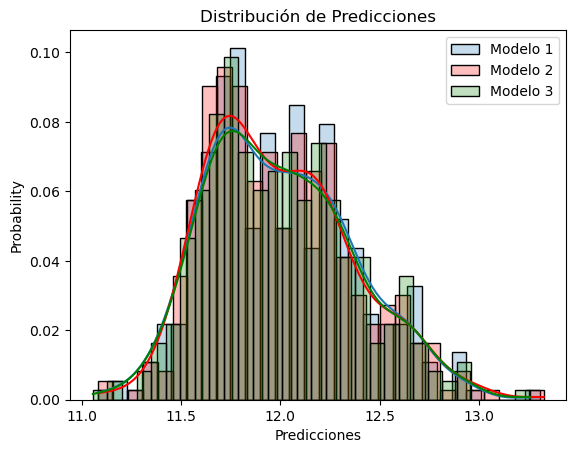

In [39]:
plt.figure()
# Histograma
sns.histplot(data = df_test,
             x = 'Pred_1',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            label = 'Modelo 1')
sns.histplot(data  = df_test, 
             x = 'Pred_2', 
             bins = 30, 
             alpha = 0.25, 
             kde = True, 
             stat='probability', 
             color='red', 
             label='Modelo 2')
sns.histplot(data  = df_test, 
             x = 'Pred_3', 
             bins = 30, 
             alpha = 0.25, 
             kde = True, 
             stat='probability', 
             color='green',
             label='Modelo 3')
plt.title('Distribución de Predicciones')
plt.xlabel('Predicciones')
plt.legend()
plt.show()

In [40]:
# Metricas
rmse_3_test = mean_squared_error(df_test['SalePrice_Log'], df_test['Pred_3'], squared=False)
r_squared_3_test = r2_score(df_test['SalePrice_Log'], df_test['Pred_3'])
rmse_3_train = mean_squared_error(df_train['SalePrice_Log'], df_train['Pred_3'], squared=False)
r_squared_3_train = r2_score(df_train['SalePrice_Log'], df_train['Pred_3'])

print('RMSE')
print('MODELO 1')
print('TEST: ' + str(rmse_1_test.round(4)))
print('TRAIN: ' + str(rmse_1_train.round(4)))
print('----------------')
print('MODELO 2')
print('TEST: ' + str(rmse_2_test.round(4)))
print('TRAIN: ' + str(rmse_2_train.round(4)))
print('----------------')
print('MODELO 3')
print('TEST: ' + str(rmse_3_test.round(4)))
print('TRAIN: ' + str(rmse_3_train.round(4)))

RMSE
MODELO 1
TEST: 0.1646
TRAIN: 0.1713
----------------
MODELO 2
TEST: 0.1669
TRAIN: 0.1786
----------------
MODELO 3
TEST: 0.1649
TRAIN: 0.1719


In [41]:
print('r - 2')
print('MODELO 1')
print('TEST: ' + str(r_squared_1_test.round(4)))
print('TRAIN: ' + str(r_squared_1_train.round(4)))
print('----------------')
print('MODELO 2')
print('TEST: ' + str(r_squared_2_test.round(4)))
print('TRAIN: ' + str(r_squared_2_train.round(4)))
print('----------------')
print('MODELO 3')
print('TEST: ' + str(r_squared_3_test.round(4)))
print('TRAIN: ' + str(r_squared_3_train.round(4)))

r - 2
MODELO 1
TEST: 0.8435
TRAIN: 0.8102
----------------
MODELO 2
TEST: 0.8391
TRAIN: 0.7939
----------------
MODELO 3
TEST: 0.8431
TRAIN: 0.809


# Clustering

# K - Means
## Identificar cantidad de clusters óptima
Utilizaremos la métrica 'inertia_', que se utiliza para evaluar la calidad de la agrupación resultante. 
<br>

Mide cuánto están dispersos los puntos dentro de cada clúster. En otras palabras, cuantifica la variabilidad total dentro de los clústeres.
<br>

Se busca un punto en el que la inertia disminuye significativamente a medida que se aumenta el número de clústeres (k) y luego se estabiliza. Este punto se conoce como el "codo" en el gráfico de la inertia frente al número de clústeres. El número de clústeres correspondiente a este codo se considera un buen candidato para el número óptimo de clústeres. 
<br>

In [42]:
features_base = ['OverallQual','GarageCars','GrLivArea','Antig_Viv','GarageArea',
                 'Antig_Rem','FullBath','TotalBsmtSF','Var_1stFlrSF','TotRmsAbvGrd','MasVnrArea']

medias = df_train[features_base].mean()
desvios = df_train[features_base].std()

df_train_normalizada = (df_train[features_base] - medias) / desvios
df_test_normalizada = (df_test[features_base] - medias) / desvios

X_train_norm = df_train_normalizada.values
X_test_norm = df_test_normalizada.values


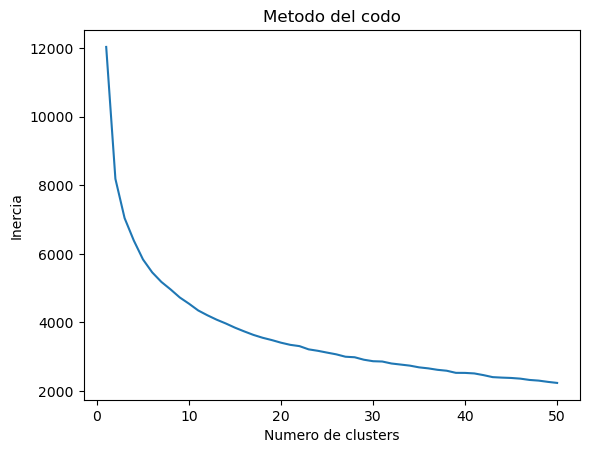

In [43]:
# Libreria para KMeans
from sklearn.cluster import KMeans
# Genero distintos algoritmos para definir el n_cluster que más me convence
wcss = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 51), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

In [44]:
# Genero el modelo
n_clusters = 10
kmeans = KMeans(n_clusters = n_clusters, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)

In [45]:
# Construyo dataframe con predicciones 
df_analizar_pred = pd.DataFrame(X_train_norm)
df_analizar_pred['Cluster'] = kmeans.fit_predict(X_train_norm)
df_analizar_pred.head()

,0,1,2,3,4,5,6,7,8,9,10,Cluster
0,0.636782,0.293696,-0.051620,-1.100502,-0.192529,-1.011871,0.772519,0.642599,0.861699,0.268055,-0.519066,7
1,-0.094883,0.293696,-0.421500,-0.153777,0.030681,-0.770540,-1.062423,-0.046777,0.357732,-0.962636,-0.023278,0
2,-0.094883,-1.069005,-0.518237,1.086758,-0.938147,1.739302,-1.062423,-1.128152,-1.221364,-0.347291,-0.600725,4
3,-0.826548,-1.069005,-0.207159,0.335908,-0.909652,0.291316,-1.062423,-0.186455,0.649774,-0.347291,-0.600725,9
4,-0.094883,-1.069005,-0.169222,0.401199,-0.838415,1.256640,-1.062423,0.858874,0.701463,0.268055,0.816646,5


In [46]:
df_analizar_pred['Cluster'].value_counts().sort_index()

0    145
1     47
2    113
3     82
4    173
5     98
6     16
7    155
8    168
9     98
Name: Cluster, dtype: int64

In [47]:
# Agrego target
df_train_normalizada = df_train_normalizada.reset_index()
df_train = df_train.reset_index()
df_analizar_pred['SalePrice_Log'] = df_train['SalePrice_Log']

Text(0.5, 1.0, 'Relación entre Logaritmo del Precio de Venta y Cluster')

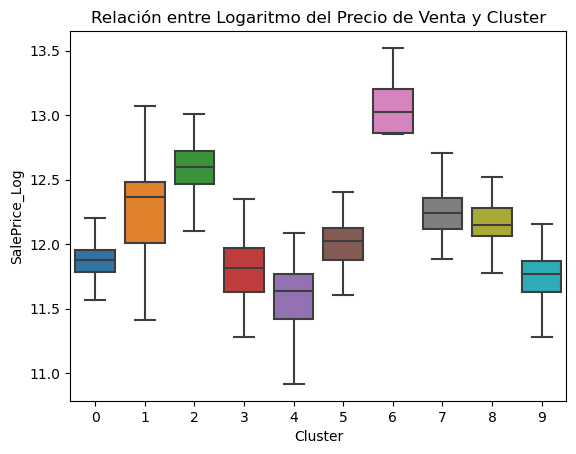

In [48]:
# Boxplot
plt.figure()
sns.boxplot(data = df_analizar_pred,
            x = 'Cluster',
            y = 'SalePrice_Log', 
            showfliers = False)
plt.title('Relación entre Logaritmo del Precio de Venta y Cluster')

In [49]:
# Analicemos el contenido de cada cluster
df_train['Cluster'] = df_analizar_pred['Cluster']
resultados = df_train.groupby('Cluster').agg(           
    Promedio_OverallQual = ('OverallQual', 'mean'),
    Promedio_GarageCars = ('GarageCars', 'mean'),
    Promedio_GrLivArea = ('GrLivArea', 'mean'),
    Promedio_Antig_Viv = ('Antig_Viv', 'mean'),
    Promedio_GarageArea = ('GarageArea', 'mean'),
    Promedio_Antig_Rem = ('Antig_Rem', 'mean'),
    Promedio_FullBath = ('FullBath', 'mean'),
    Promedio_Var_1stFlrSF = ('Var_1stFlrSF', 'mean'),
    Promedio_TotRmsAbvGrd = ('TotRmsAbvGrd', 'mean'),
    Promedio_MasVnrArea = ('MasVnrArea', 'mean')
).reset_index()
resultados

,Cluster,Promedio_OverallQual,Promedio_GarageCars,Promedio_GrLivArea,Promedio_Antig_Viv,Promedio_GarageArea,Promedio_Antig_Rem,Promedio_FullBath,Promedio_Var_1stFlrSF,Promedio_TotRmsAbvGrd,Promedio_MasVnrArea
0,0,5.303448,1.958621,1087.772414,37.531034,534.634483,23.696552,1.055172,1050.317241,5.220690,44.779310
1,1,6.361702,1.957447,2524.808511,68.893617,523.212766,22.361702,2.021277,1481.574468,9.808511,24.191489
2,2,8.088496,2.805310,2048.513274,5.327434,772.991150,4.336283,2.044248,1542.088496,8.035398,321.938053
3,3,5.378049,1.743902,1548.195122,80.304878,469.695122,46.365854,1.475610,998.500000,7.000000,0.000000
4,4,4.901734,0.895954,1054.815029,57.578035,252.895954,49.994220,1.028902,902.150289,5.312139,40.820809
5,5,5.816327,1.887755,1667.520408,43.785714,507.846939,40.377551,1.602041,1389.224490,7.112245,245.030612
6,6,9.250000,2.875000,3253.000000,9.375000,897.812500,4.937500,2.500000,2394.000000,10.000000,643.437500
7,7,7.006452,2.083871,1517.587097,10.954839,544.903226,7.212903,1.922581,1480.167742,6.129032,89.741935
8,8,6.702381,2.035714,1692.476190,11.273810,501.291667,9.005952,2.017857,884.916667,6.982143,70.958333
9,9,5.214286,0.683673,1268.795918,64.663265,187.428571,10.724490,1.193878,970.540816,6.010204,15.969388


# Clusters V2
Intentemos con menos features

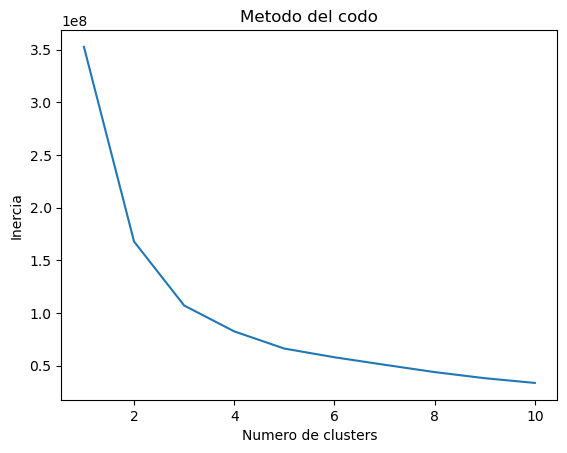

In [50]:
features_base = ['GarageArea','GrLivArea']

X_train_norm = df_train[features_base].values
X_test_norm = df_test[features_base].values

# Genero distintos algoritmos para definir el n_cluster que más me convence
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

In [51]:
# Genero el modelo
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)

In [52]:
# Construyo dataframe con predicciones 
df_analizar_pred = pd.DataFrame(X_train_norm)
df_analizar_pred['Cluster'] = kmeans.fit_predict(X_train_norm)
df_analizar_pred.head()

,0,1,Cluster
0,437,1504,3
1,484,1309,1
2,280,1258,1
3,286,1422,3
4,301,1442,3


Text(0.5, 1.0, 'Relación entre Logaritmo del Precio de Venta y Cluster')

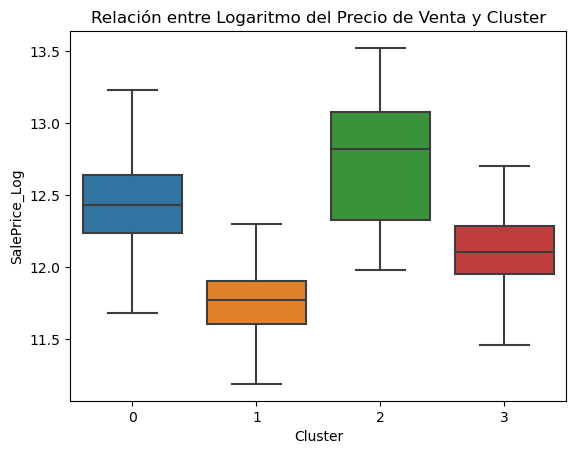

In [53]:
# Agrego target
df_analizar_pred['SalePrice_Log'] = df_train['SalePrice_Log']
# Boxplot
plt.figure()
sns.boxplot(data = df_analizar_pred,
            x = 'Cluster',
            y = 'SalePrice_Log', 
            showfliers = False)
plt.title('Relación entre Logaritmo del Precio de Venta y Cluster')

In [54]:
# Analicemos el contenido de cada cluster
df_train['Cluster'] = df_analizar_pred['Cluster']
resultados = df_train.groupby('Cluster').agg(           
    Promedio_GarageArea = ('GarageArea', 'mean'),
    Promedio_GrLivArea = ('GrLivArea', 'mean')
).reset_index()
resultados

,Cluster,Promedio_GarageArea,Promedio_GrLivArea
0,0,630.030928,2226.118557
1,1,364.404206,1064.787383
2,2,747.500000,3616.187500
3,3,509.310722,1600.052516


<Axes: xlabel='GarageArea', ylabel='GrLivArea'>

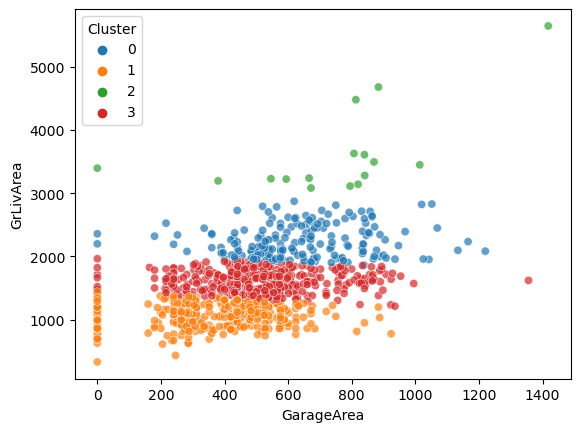

In [55]:
# 'SalePrice','GrLivArea' y 'Calificacion'
df_train['Cluster'] = df_analizar_pred['Cluster'].astype('category')
sns.scatterplot(data = df_train,
                x = 'GarageArea',
                y = 'GrLivArea',
                hue = 'Cluster',
                alpha = 0.7)